In [12]:
# Install this module whenever libnirs isn't 
#%pip install --user -U git+https://github.com/jdtatz/libnirs.git

In [13]:
import numpy as np
from libnirs import *
import pandas as pd
import math
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from matplotlib import ticker, cm
from matplotlib import colors
from matplotlib import rc


In [14]:
#Run this just on local 
%env PATH=/Library/TeX/texbin:$PATH

env: PATH=/Library/TeX/texbin:$PATH


In [15]:
file_names = ['Only_LRF_IVH','Only_LRF_Preterm']
keys=['IVH','PBI']

In [16]:
wavelengths = ['673','686','701','724','754','784','814','827','852']
population_dataframes_dict={}
for name, key in zip(file_names, keys): 
    population_dataframes_dict[key] = pd.read_excel(name+'.xlsx')
    organized_df = pd.DataFrame()
    
    for w in wavelengths: 
        try: 
            organized_df['µsp_'+w] = population_dataframes_dict[key]['musp'+w]
        except:
            organized_df['µsp_'+w] = population_dataframes_dict[key]['ms_'+w]

        try: 
            organized_df['µa_'+w] = population_dataframes_dict[key]['mua'+w]
        except:
            organized_df['µa_'+w] = population_dataframes_dict[key]['ma_'+w]
                
        try: 
            organized_df['µsp_'+w] = population_dataframes_dict[key]['musp'+w]
        except:
            organized_df['µsp_'+w] = population_dataframes_dict[key]['ms_'+w]
        try: 
            organized_df['µa_'+w] = population_dataframes_dict[key]['mua'+w]
        except:
            organized_df['µa_'+w] = population_dataframes_dict[key]['ma_'+w]
    
    organized_df = organized_df.dropna()
    
    population_dataframes_dict[key] = organized_df

In [17]:

def create_dictionary_µs(dictionary_of_data_frames,wvls):
    µus_dict = {}; min_value_µa = 10000; min_value_µsp = 1000; max_value_µa = 0; max_value_µsp = 0;
    for key in list(dictionary_of_data_frames.keys()):
        µsp_dict = {}; µa_dict = {}; µ_categories={};
        for w in wvls:
            µsp_dict[w] = np.asarray(dictionary_of_data_frames[key]['µsp_'+w])
            µa_dict[w] = np.asarray(dictionary_of_data_frames[key]['µa_'+w])
           
            if min(µsp_dict[w]) < min_value_µsp: 
                min_value_µsp = min(µsp_dict[w])
            if min(µa_dict[w]) < min_value_µa: 
                min_value_µa = min(µa_dict[w])
                
            if max(µsp_dict[w]) > max_value_µsp: 
                max_value_µsp = max(µsp_dict[w])
            if max(µa_dict[w]) > max_value_µa: 
                max_value_µa = max(µa_dict[w])
                
        µ_categories['µsp_dict']= µsp_dict 
        µ_categories['µa_dict']= µa_dict 
        µus_dict[key] =  µ_categories
        
        
    
    return µus_dict, max_value_µsp, min_value_µsp, max_value_µa, min_value_µa

In [18]:
µs_values_dict, max_value_µsp_, min_value_µsp_, max_value_µa_, min_value_µa_ = create_dictionary_µs(population_dataframes_dict,wavelengths)

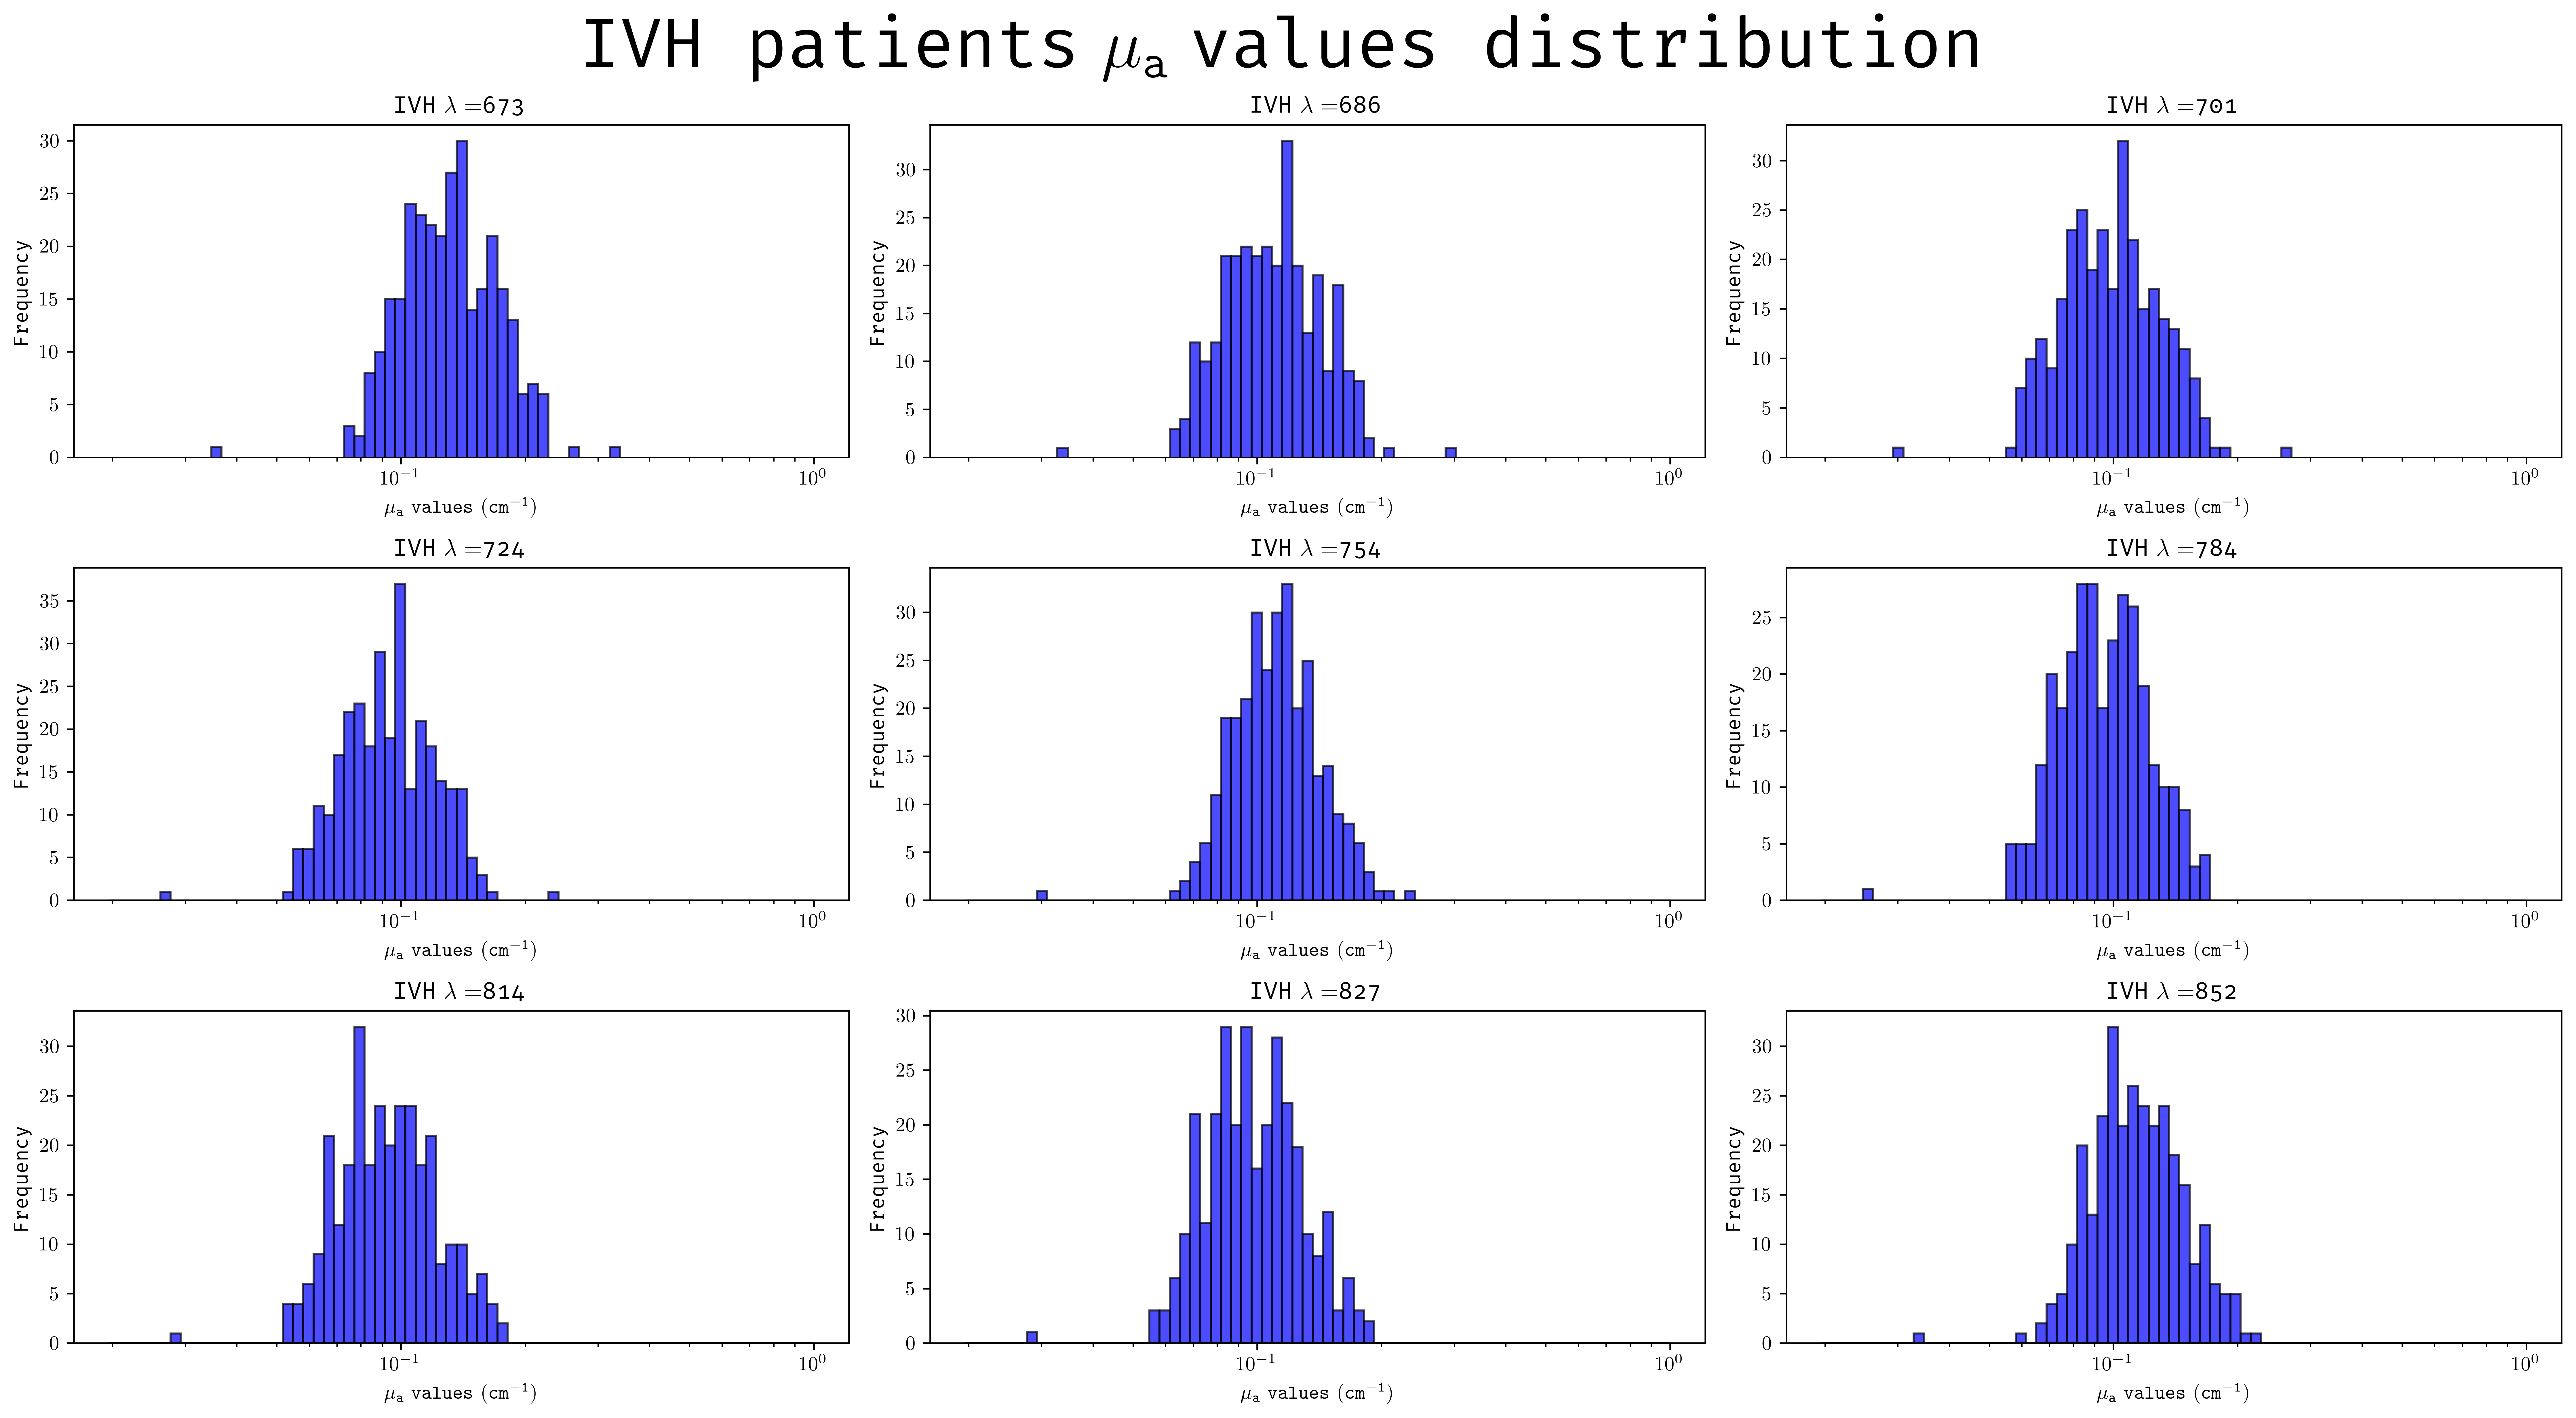

In [19]:
# Use LaTeX for text rendering
plt.rc('text', usetex=True)

# Define LaTeX preamble with \usepackage{mathrsfs}
latex_preamble = r'\usepackage[T1]{fontenc} \usepackage{FiraMono}'

# Set the LaTeX preamble
rc('text.latex', preamble=latex_preamble)

# Your existing code
num_histograms = 9
log_bins_µa = np.logspace(np.log10(min_value_µa_), np.log10(1), 70)

fig, axs = plt.subplots(3, 3, figsize=(18, 10), dpi=500)
axs = axs.flatten()

for wv in range(len(wavelengths)):
    axs[wv].hist(µs_values_dict['IVH']['µa_dict'][wavelengths[wv]], bins=log_bins_µa, color='blue', edgecolor='black', alpha=0.7)
    axs[wv].set_xscale('log')
    axs[wv].set_xlabel(r'$\mathtt{\mu_a\ values}$ ($\mathtt{cm^{-1}}$)')
    axs[wv].set_ylabel(r"$\texttt{Frequency}$")
    axs[wv].set_title(r"$\texttt{IVH} \ \mathtt{\lambda} = $" + r"$\texttt{" + f"{wavelengths[wv]}" + r"}$")


fig.suptitle(r"$\texttt{IVH patients} \ \mathtt{\mu_a} \ \texttt{values distribution}$", fontsize=35, fontweight='bold')

#plt.tight_layout()
plt.tight_layout()
plt.savefig('your_figure.png', dpi=500)  
plt.show()


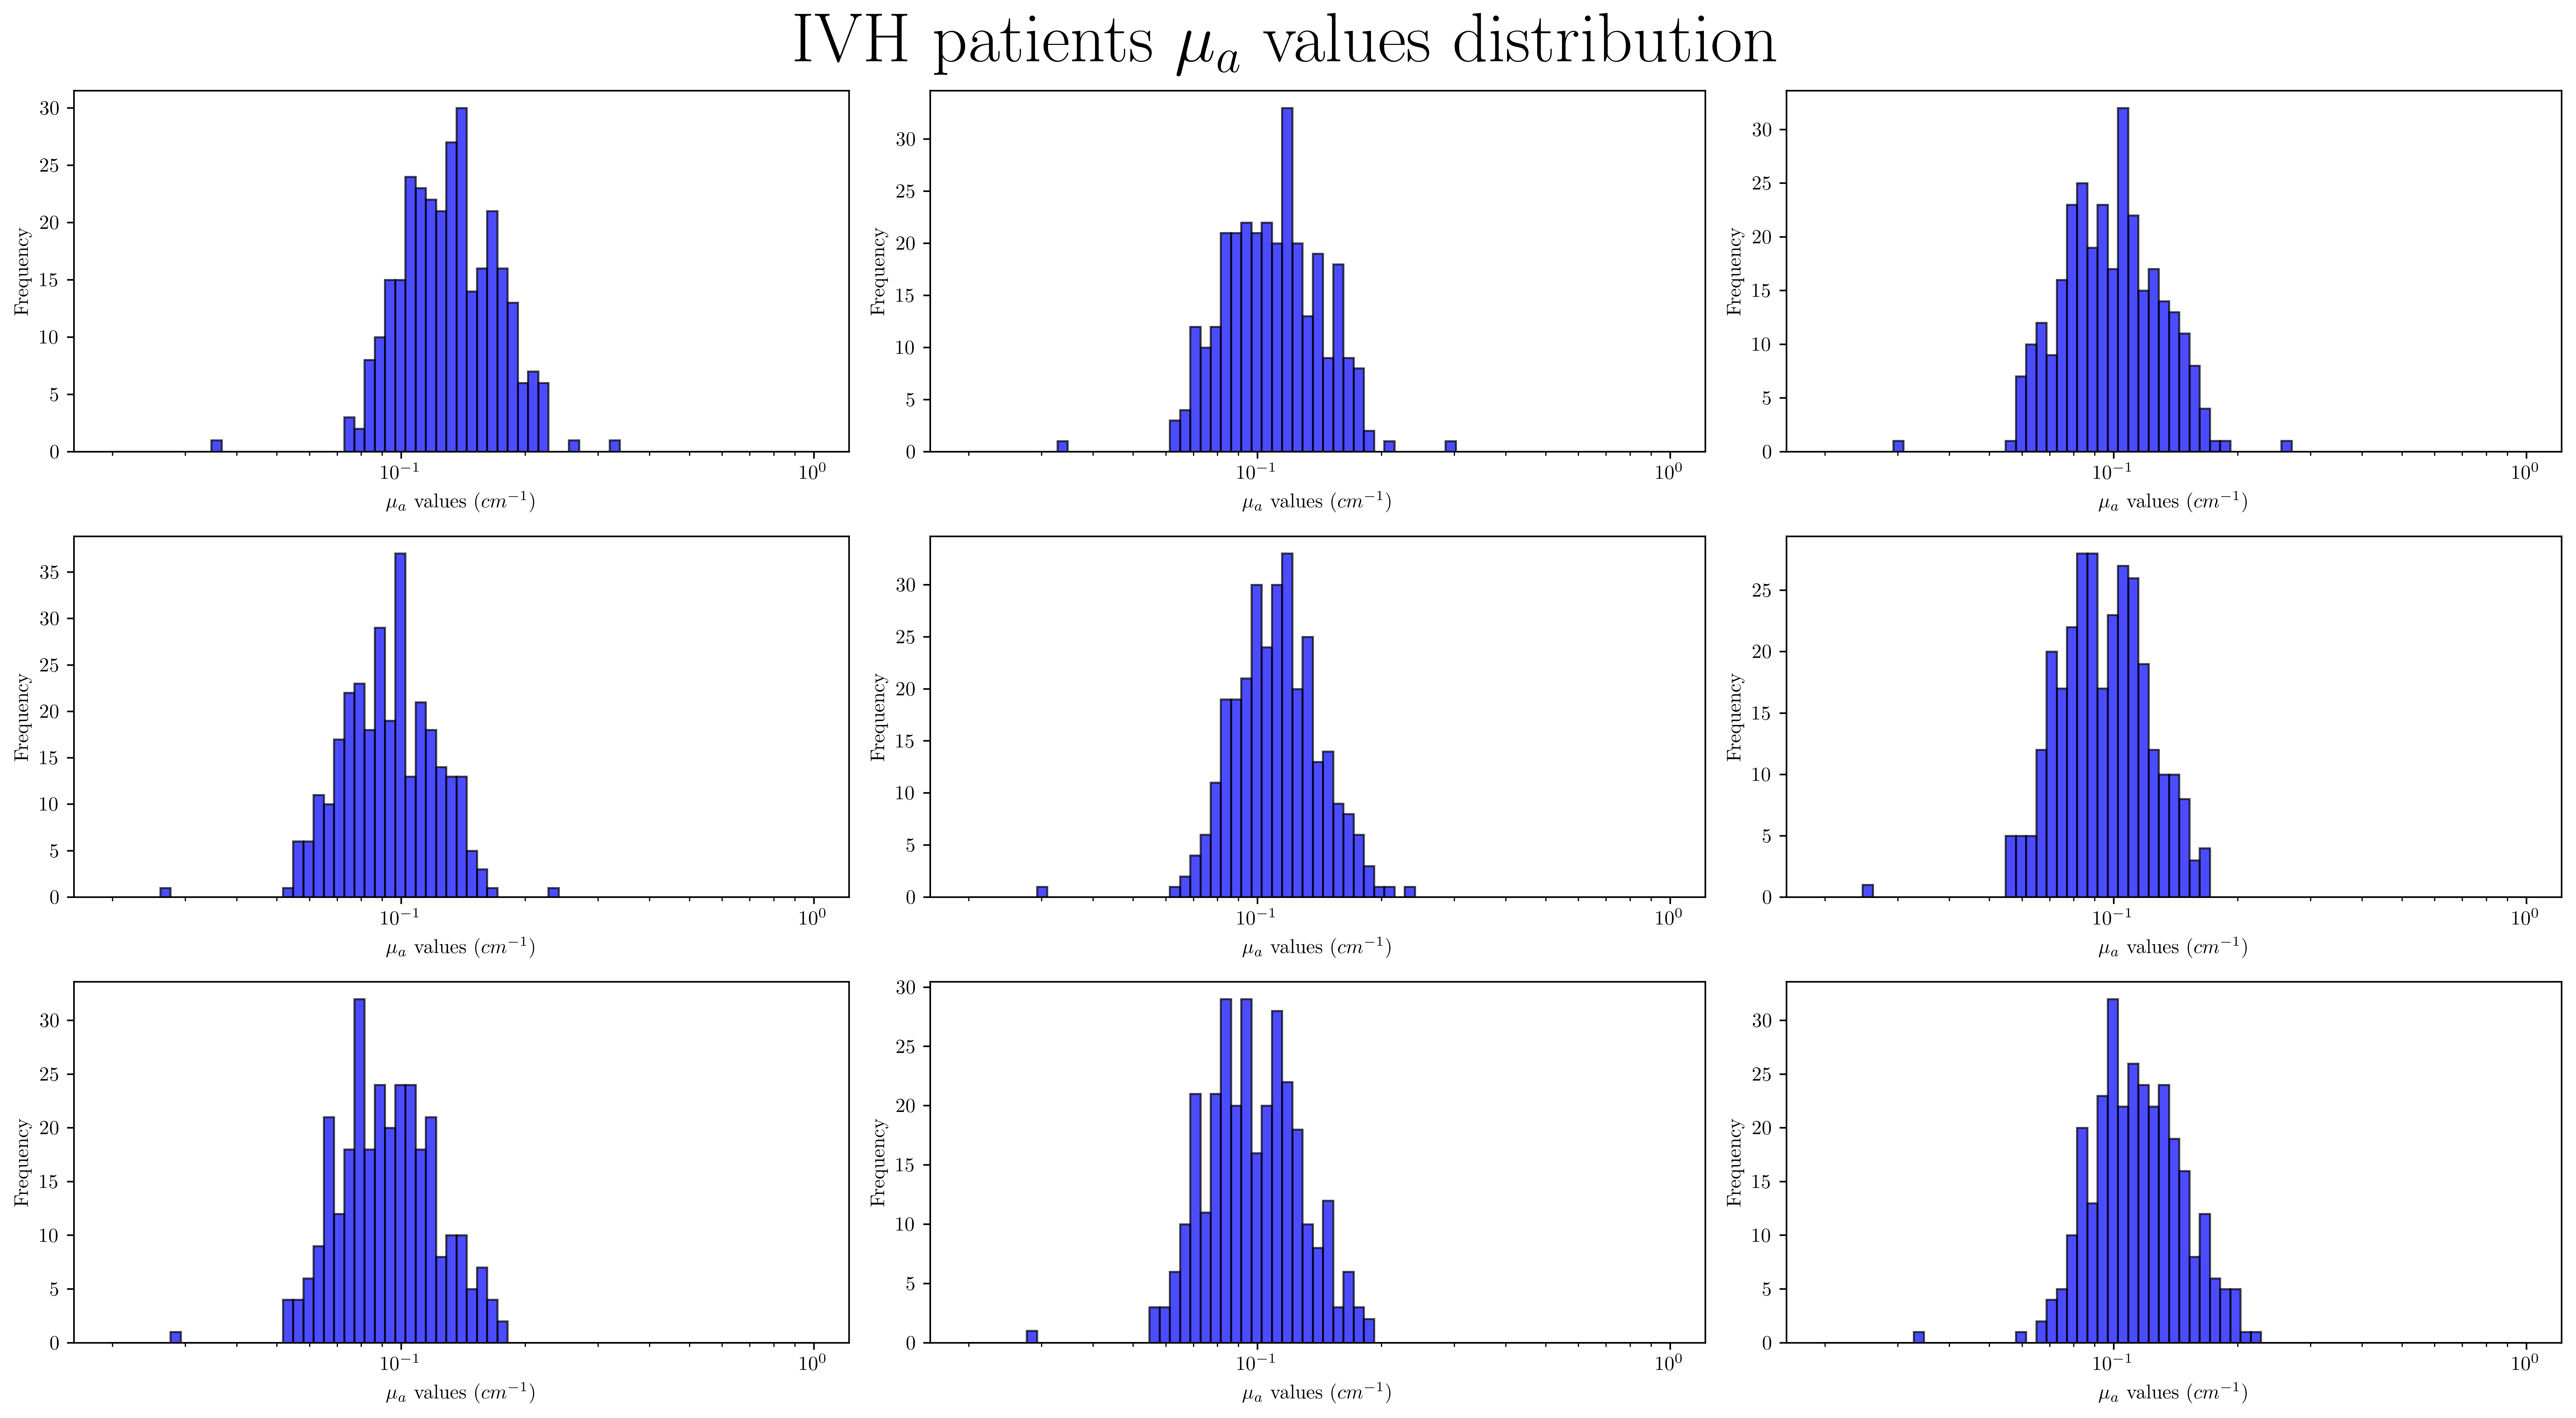

In [23]:
# Set the path to the LaTeX distribution
from matplotlib import rcParams

latex_path = '/usr/local/texlive/2023/bin/universal-darwin'
rcParams['text.usetex'] = True
rcParams['text.latex.preamble'] = r'\usepackage{{amsmath}}\usepackage{{amsfonts}}\usepackage{{amssymb}}'
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Computer Modern Roman']
rcParams['mathtext.fontset'] = 'cm'


# Your existing code
num_histograms = 9
log_bins_µa = np.logspace(np.log10(min_value_µa_), np.log10(1), 70)

fig, axs = plt.subplots(3, 3, figsize=(18, 10), dpi=500)
axs = axs.flatten()

for wv in range(len(wavelengths)):
    axs[wv].hist(µs_values_dict['IVH']['µa_dict'][wavelengths[wv]], bins=log_bins_µa, color='blue', edgecolor='black', alpha=0.7)
    axs[wv].set_xscale('log')
    axs[wv].set_xlabel(r'$\mu_a$ values ($cm^{-1}$)')
    axs[wv].set_ylabel(r"Frequency")

fig.suptitle(r"IVH patients $\mu_a$ values distribution", fontsize=35, fontweight='bold')

#plt.tight_layout()
plt.tight_layout()
plt.savefig('your_figure.png', dpi=500)  
plt.show()



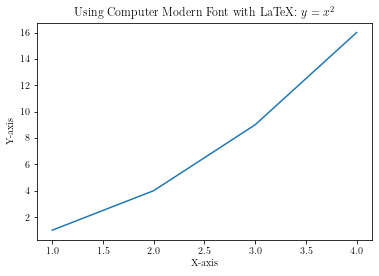

In [24]:
# Simple latex example

import matplotlib.pyplot as plt
from matplotlib import rcParams

# Set the path to the LaTeX distribution
latex_path = '/usr/local/texlive/2023/bin/universal-darwin'
rcParams['text.usetex'] = True
rcParams['text.latex.preamble'] = r'\usepackage{{amsmath}}\usepackage{{amsfonts}}\usepackage{{amssymb}}'
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Computer Modern Roman']
rcParams['mathtext.fontset'] = 'cm'

# Example plot
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
plt.title(r'Using Computer Modern Font with LaTeX: $y = x^2$')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Save the plot instead of showing it
#plt.savefig('test_plot.png')
